<a href="https://colab.research.google.com/github/Nathy-M/Nathy-M/blob/main/c2w1_ungraded_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [32]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-11-06 21:29:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 142.251.162.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   257MB/s    in 0.3s    

2022-11-06 21:29:53 (257 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]



In [33]:
import zipfile
zfile = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zfile, 'r')
zip_ref.extractall()
zip_ref.close()

In [34]:
base_dir = 'cats_and_dogs_filtered'
print('Directories inside cats and dogs filtered..:', os.listdir(base_dir))
print('Directories in train are:')
print(os.listdir(f'{base_dir}/train'))
print('Directories in validation are:')
print(os.listdir(f'{base_dir}/validation'))

Directories inside cats and dogs filtered..: ['train', 'validation', 'vectorize.py']
Directories in train are:
['dogs', 'cats']
Directories in validation are:
['dogs', 'cats']


In [35]:
train = os.path.join(base_dir, 'train')
validation = os.path.join(base_dir, 'validation')
cats_train = os.path.join(train, 'cats')
dogs_train = os.path.join(train, 'dogs')

cats_validation = os.path.join(validation, 'cats')
dogs_validation = os.path.join(validation, 'dogs')

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)      

In [44]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_img = train_datagen.flow_from_directory(
    train,
    class_mode = 'binary',
    batch_size = 20,
    target_size = (150,150)
)
validation_img = train_datagen.flow_from_directory(
    validation,
    class_mode = 'binary',
    batch_size = 20,
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
history = model.fit(train_img, epochs = 10, validation_data = validation_img, verbose = 2)

Epoch 1/10
100/100 - 61s - loss: 0.6967 - accuracy: 0.5555 - val_loss: 0.6601 - val_accuracy: 0.5850 - 61s/epoch - 610ms/step
Epoch 2/10
100/100 - 59s - loss: 0.6224 - accuracy: 0.6510 - val_loss: 0.6264 - val_accuracy: 0.6090 - 59s/epoch - 593ms/step
Epoch 3/10
100/100 - 59s - loss: 0.5574 - accuracy: 0.7195 - val_loss: 0.5694 - val_accuracy: 0.7040 - 59s/epoch - 595ms/step
Epoch 4/10
100/100 - 60s - loss: 0.4509 - accuracy: 0.7835 - val_loss: 0.5437 - val_accuracy: 0.7370 - 60s/epoch - 595ms/step
Epoch 5/10
100/100 - 60s - loss: 0.3565 - accuracy: 0.8425 - val_loss: 0.5565 - val_accuracy: 0.7320 - 60s/epoch - 597ms/step
Epoch 6/10
100/100 - 59s - loss: 0.2675 - accuracy: 0.8905 - val_loss: 0.6526 - val_accuracy: 0.7100 - 59s/epoch - 592ms/step
Epoch 7/10
100/100 - 59s - loss: 0.1886 - accuracy: 0.9225 - val_loss: 0.7104 - val_accuracy: 0.7220 - 59s/epoch - 593ms/step
Epoch 8/10
100/100 - 60s - loss: 0.1274 - accuracy: 0.9495 - val_loss: 0.8731 - val_accuracy: 0.7220 - 60s/epoch - 596

Text(0.5, 1.0, 'Training and validation loss')

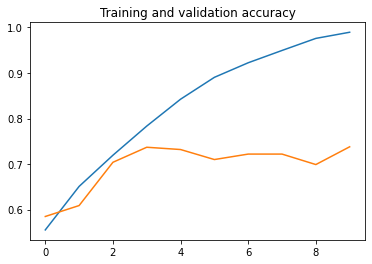

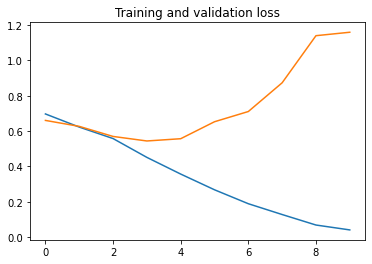

In [47]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')